# What is polynomial regression?

## In machine learning a polynomial regression is a form of regression analysis in which the relationship between the indepedent variablex and the dependent variable y is modeled as an nth degree polynomial in x

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('position_salaries.csv')
df.head(9)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000


In [5]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

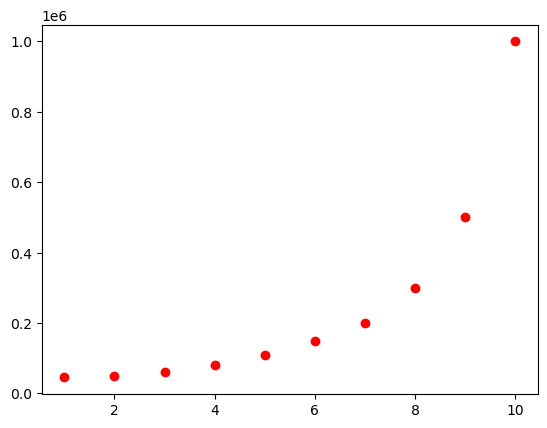

In [8]:
plt.scatter(x,y,color='red')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x ,y,test_size=0.2 , random_state=42)

In [11]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_train)

In [12]:
lin_regar=LinearRegression()

In [13]:
lin_regar.fit(x_train, y_train)

LinearRegression()

In [14]:
def viz_linear():
    plt.scatter(x,y,color = 'red')
    plt.plot(x , lin_regar.predict(x),color='blue')
    plt.title('truth or bluff(Linear regression)')
    plt.xlabel("position level")
    plt.ylabel('salary')
    plt.show()
    return

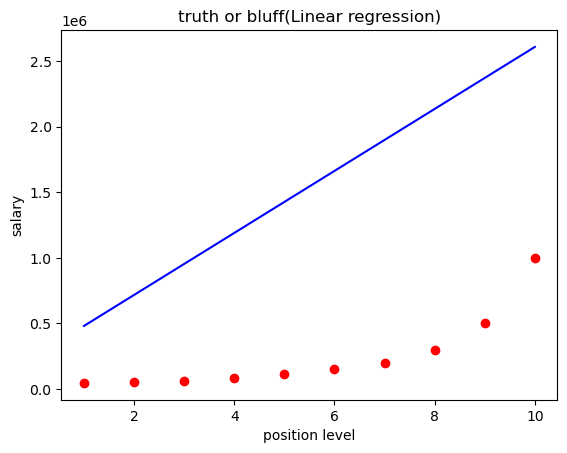

In [15]:
viz_linear()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
pol_reg=LinearRegression()
pol_reg.fit(x_poly,y)

LinearRegression()

In [18]:
def viz_polynomial():
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.show()
    return


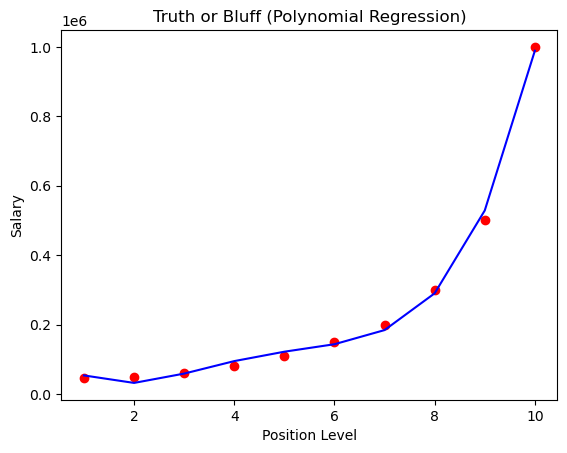

In [19]:
viz_polynomial()

In [20]:
#checking of the result with linear regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750007])

In [21]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750007])

# Create a data randomly and visulize and do the operation of polynomial regression

In [36]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

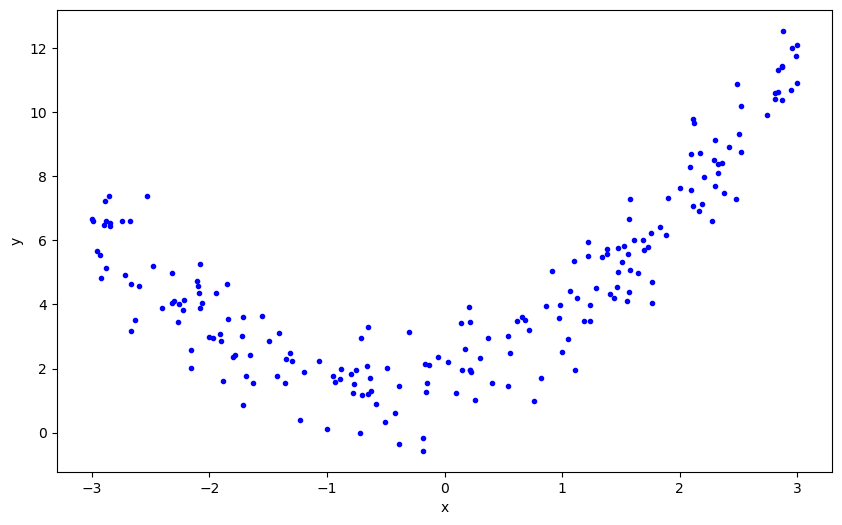

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,marker='.',color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x ,y,test_size=0.2 , random_state=42)

In [25]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

## Create a model of linear_regression and check the r2score value of it

In [26]:
lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score

In [28]:
y_pred = lin_reg.predict(x_test)

In [29]:
score = r2_score(y_test , y_pred)
print(score*100)

14.945304400996251


Text(0, 0.5, 'y')

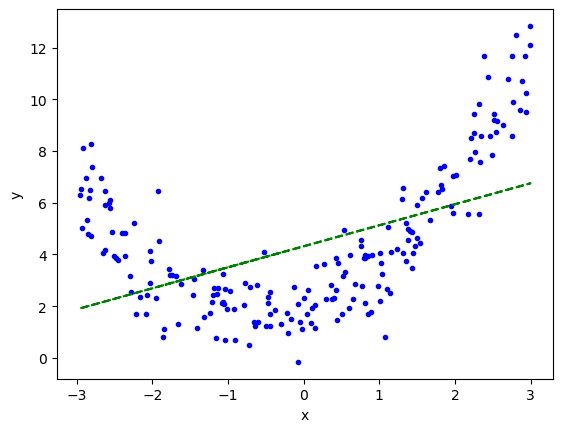

In [30]:
plt.plot(x_train , lin_reg.predict(x_train) , color = 'green' , ls ='dashed')

plt.scatter(x , y , marker='.' , color= 'blue')
plt.xlabel('x')
plt.ylabel('y')

## lets do the complete operation into the polynomial regression

In [39]:
poly=PolynomialFeatures(degree=15,include_bias=True)
X_train=poly.fit_transform(x_train)
X_test=poly.transform(x_test)

In [40]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=lin_reg.predict(X_test)

In [42]:
score=r2_score(y_test,y_pred)
print(score*100)

14.945304400996251


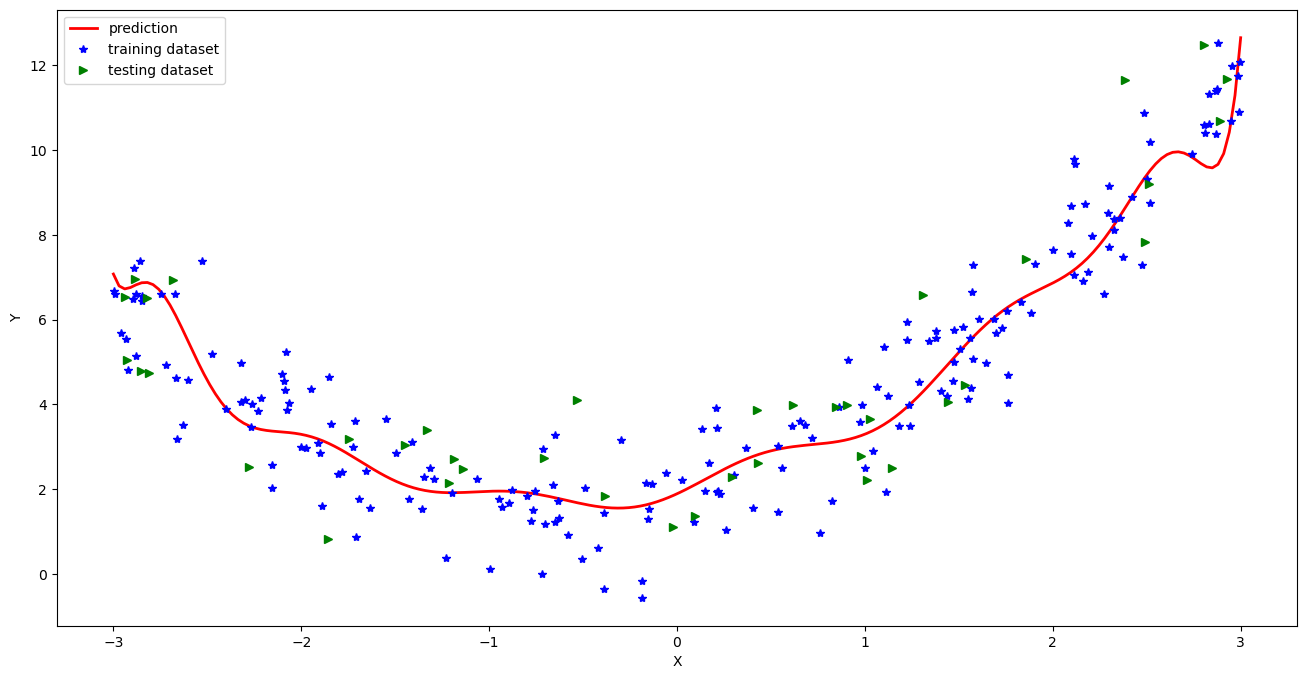

In [44]:
plt.figure(figsize=(16,8))
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='prediction')
plt.plot(x,y,'b*',label='training dataset')
plt.plot(x_test,y_test,'g>',label='testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

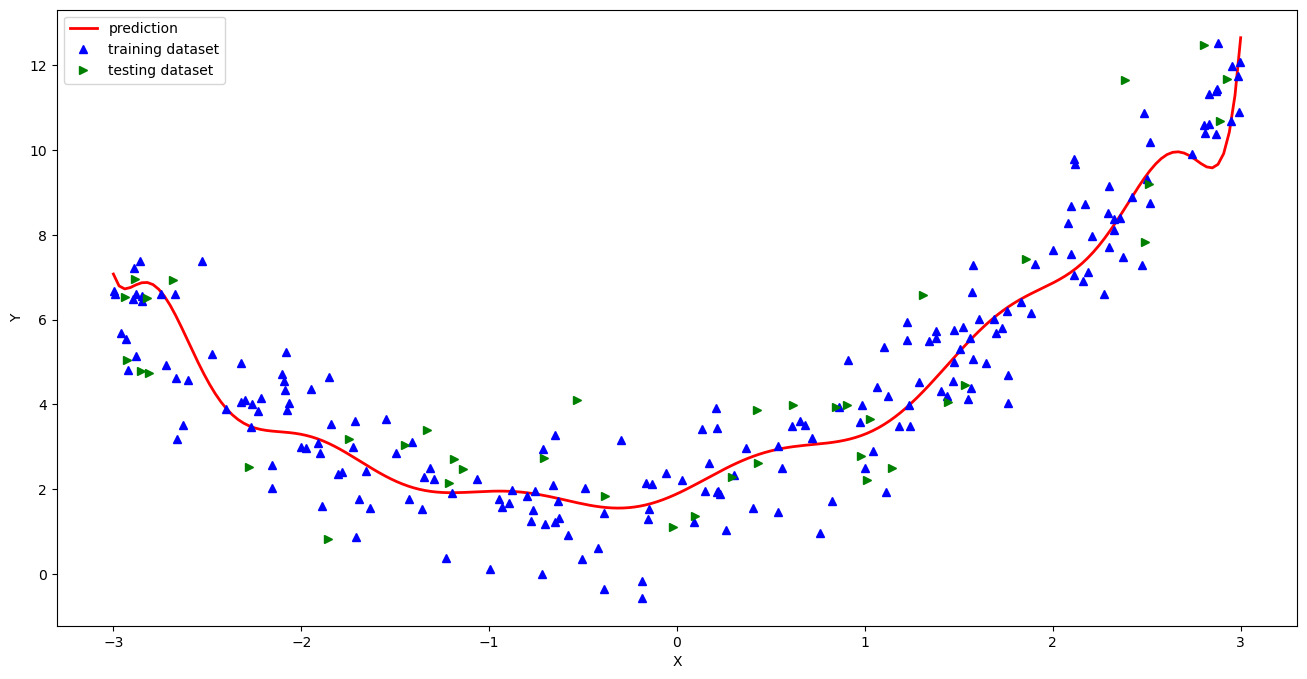

In [43]:
plt.figure(figsize=(16,8))
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='prediction')
plt.plot(x,y,'b^',label='training dataset')
plt.plot(x_test,y_test,'g>',label='testing dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()